# 03/09/21 - General candidate selection and data preparation. 5th model. G585328_3234.

In [1]:
### libraries
%matplotlib inline
import matplotlib.pyplot as plt
from autoconf import conf
import autolens as al
import autolens.plot as aplt
import autofit as af
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
import scipy.stats as stats
from astropy.stats import sigma_clip as clip

from pyprojroot import here

workspace_path = '/data/sknabel/autolens_workspace'
#workspace_path = '~/Desktop/autolens_workspace'
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")
# paths
autoz_path = '/data/sknabel/autoz_lens_model/'
#autoz_path = '/home/shawn/Desktop/autoz_lens_model/'
file_path = f'{autoz_path}files/'
csv_path = f'{file_path}csv/'
latest_path = f'{csv_path}latest/'
fits_path = f'{file_path}fits/'
png_path = f'{autoz_path}visuals/png/'
pdf_path = f'{autoz_path}visuals/pdf/'

In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_tes

/data/sknabel/autolens_workspace
Working Directory has been set to `/data/sknabel/autolens_workspace`


In [2]:
links = pd.read_csv(f'{latest_path}links_sample_latest.csv')
links.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'GAMA_ID', 'ID', 'RA', 'DEC', 'score',
       'Unnamed: 0_y', 'z1', 'sigma1', 'template1', 'z2', 'sigma2',
       'template2', 'sigma3', 'sigma4', 'R', 'prob', 'error', 'type',
       'type_number', 'lambdar_log_mstar', 'lambdar_mstar',
       'lambdar_log_mstar_error', 'z', 'zlens', 'zsource', 'sigma_lens',
       'sigma_source', 'dlens', 'dsource', 'corrected_stellar_mass', 'P1',
       'P3', 'normalized_score', 'cnn_probability', 'm_half_re', 'sigma_star',
       'theta_e_pm', 'theta_e_sis'],
      dtype='object')

In [3]:
links_candidates = links[['GAMA_ID', 'ID', 'RA', 'DEC', 'score', 'z1', 'z2', 'lambdar_log_mstar', 'theta_e_pm', 'theta_e_sis', 'type']].sort_values(by='score', ascending=False)
links_candidates

,GAMA_ID,ID,RA,DEC,score,z1,z2,lambdar_log_mstar,theta_e_pm,theta_e_sis,type
18,323152.0,2967,130.54643,1.64325,30.0,0.721590,0.353286,NaN,NaN,NaN,PG + ELG
17,250289.0,2730,214.36708,1.99311,28.0,0.401214,0.719616,11.668818,0.917868,0.645859,PG + ELG
19,3575500.0,1906,129.23265,-1.57512,26.0,0.365195,0.232537,11.760890,1.296096,0.762649,ELG + PG
31,3629152.0,1933,135.88864,-0.97487,26.0,0.406623,0.787118,11.630485,0.896116,0.659574,PG + PG
11,544226.0,3212,214.42336,-0.89247,18.0,0.227044,0.649824,11.285226,0.875230,0.725515,PG + ELG
5,585328.0,3234,182.36838,-0.00889,18.0,0.204663,0.788741,11.414567,1.181452,0.993895,PG + ELG
32,3891172.0,3056,139.22725,-1.54519,16.0,0.339517,0.609052,11.422040,0.710912,0.514473,PG + PG
27,138582.0,2828,183.14009,-1.82700,14.0,0.325175,0.432648,11.563930,0.675886,0.360781,ELG + ELG
34,262874.0,26,221.61067,2.22389,12.0,0.385581,0.858924,11.252039,0.568603,0.467914,PG + PG
0,600305.0,245,134.75916,0.23814,12.0,0.243359,0.634666,11.614862,1.320882,1.033108,PG + ELG


In [4]:
## I am selecting G585328_3234 (tile : OBS_NAME= 'KIDS_182.0_0.5_r')

links_candidates[links_candidates.GAMA_ID == 585328]

gama_id = 585328
links_id = 3234

INFO:numexpr.utils:Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [5]:
# Let's look at r-band image
folder = f'{fits_path}G{gama_id}_{links_id}/'
r = f'{links_id}_r.fits'
g = f'{links_id}_g.fits'
i = f'{links_id}_i.fits'
# get the files ready
# r
hdul = fits.open(f'{folder}{r}') # open the fits
print(repr(hdul[0].header))
#print(hdul.info())
r_image = hdul[0].data # select first HDU to be the image
hdul.close()
# g
hdul = fits.open(f'{folder}{g}') # open the fits
print(repr(hdul[0].header))
#print(hdul.info())
g_image = hdul[0].data # select first HDU to be the image
hdul.close()
# i
hdul = fits.open(f'{folder}{i}') # open the fits
print(repr(hdul[0].header))
#print(hdul.info())
i_image = hdul[0].data # select first HDU to be the image
hdul.close()

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  101 / Number of pixels along this axis               
NAXIS2  =                  101 / Number of pixels along this axis               
EXTEND  =                    T / This file may contain FITS extensions          
OBJECT  = 'KIDS_182.0_0.5'                                                      
ZEROPNT =                  0.0                                                  
ZPNTERR =                  0.0                                                  
CREADATE= '2018-03-24T06:13:03.000'                                             
PSF_RAD =   0.6695083141326905                                                  
INSTRUME= 'OMEGACAM'                                                            
TELESCOP= 'ESO-VLT-U0'      

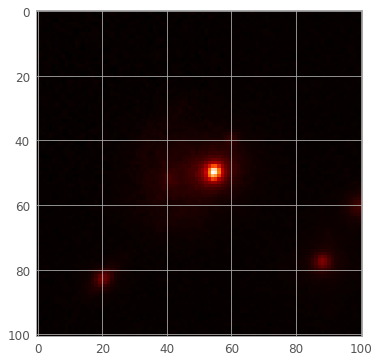

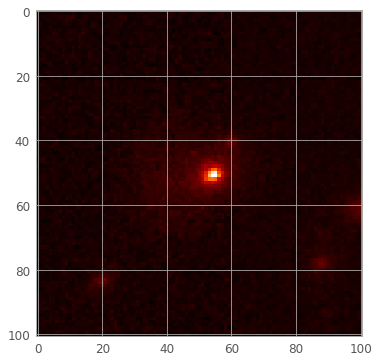

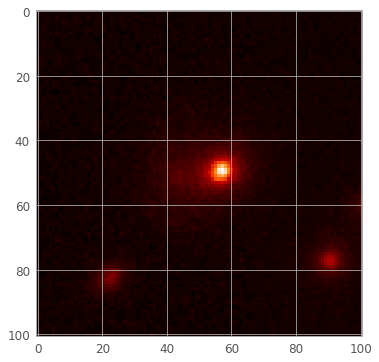

In [6]:
# plot image data
plt.figure()
plt.imshow(r_image)#, cmap='gray') # show image in grayscale
plt.show()

# plot image data
plt.figure()
plt.imshow(g_image)#, cmap='gray') # show image in grayscale
plt.show()

# plot image data
plt.figure()
plt.imshow(i_image)#, cmap='gray') # show image in grayscale
plt.show()


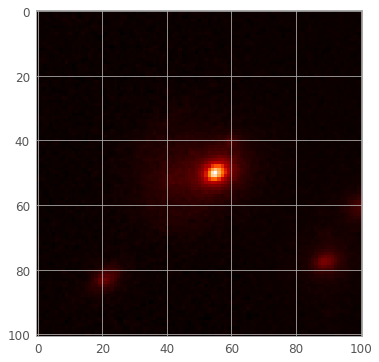

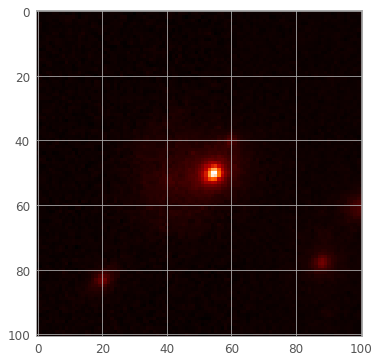

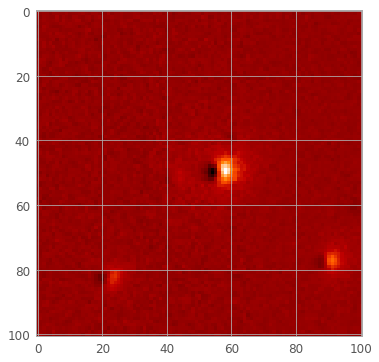

In [7]:
# I want to see if I can stack these three pictures and get a good image

# normalize each by dividing by max pixel value
r_norm = r_image/(np.max(r_image))
g_norm = g_image/(np.max(g_image))
i_norm = i_image/(np.max(i_image))

# sum the normed images for white light
white_light = r_norm + g_norm + i_norm
g_r = g_norm + r_norm
i_r = i_norm - r_norm

# plot image data
plt.figure()
plt.imshow(white_light)#, cmap='gray') # show image in grayscale
plt.show()
plt.figure()
plt.imshow(g_r)#, cmap='gray') # show image in grayscale
plt.show()
plt.figure()
plt.imshow(i_r)#, cmap='gray') # show image in grayscale
plt.show()

### Is the i-band offset from the other two?

In [8]:
# write the individual modules of the function

# get info from fits header
def reveal_yourself(header):
    # take the gain
    gain = header['GAIN']
    # take the psf
    psf = header['PSF_RAD']
    # take the filter
    gri_filter = header['FILT_ID']
    # take exposure time
    if gri_filter == 'OCAM_g_SDSS':
        exp_time = 900
    elif gri_filter == 'OCAM_r_SDSS':
        exp_time = 1800
    elif gri_filter == 'OCAM_i_SDSS':
        exp_time = 1200
    else:
        print('Error - filter not g, r, or i')
    print(f'Here we go again... psf = {psf}, gain = {gain}, exp_time = {exp_time}')
    return(psf, gain, exp_time)

def count_chocula(image, gain):
    image_counts = image*gain # create array in electron counts
    print('1, 2... 2 counts!')
    return(image_counts)

# resize
def resize_image(image, new_size):
    print(f'Resizing image to {new_size}.')
    size=image.shape[0] # 101
    center=int(image.shape[0]/2) # 50
    new_center=(new_size-1)/2
    lower = int(center-new_center) 
    upper = int(center+new_center)
    resized_image=image[lower:upper+1,lower:upper+1]
    print(f'Middle pixel at index {center}. New image created from indices {lower} to {upper} in axes 0 and 1.')
    print(f'New shape: {resized_image.shape}')
    print(f'New things are good!')
    return(resized_image)

# generate noise_map
def get_noisey (image, exp_time):
    
    plt.figure()
    plt.title = (f'{hdul[0].header[6]} signal')
    plt.hist(np.ravel(image),bins=100)#,log=True) # plot signal in histogram
    plt.show()
    print(f'Image - Mean {np.mean(image)}, Median {np.median(image)}, Min {np.min(image)}, Max {np.max(image)}')
    
    # clip to 3sigma around median
    print('Clipping to 3-sigma about median value')
    clipped_image=clip(image, cenfunc='median', sigma=3)
    
    # generate Gaussian noise about mean and std # don't use this to make noise... use the std to make the background sky level
    mean = np.mean(clipped_image) # mult by 2 or something (maybe 10)
    std = np.std(clipped_image)
    #noise_gaussian = np.random.normal(loc=mean, # what if i just take the mean... and add 10*mean to it. Then subtract that again. 
    #                                        scale=std,
    #                                        size= np.ravel(clipped_image).shape)
    #plt.hist(noise_gaussian, bins=100, density=True, label='Gaussian Fit')
    
    print(f'Numpy Background Noise: mean {mean}, std {std}')
    #plt.hist(background_noise)
    #alternative method with scipy.norm.fit ... for whatever reason it is giving me nonsense answers here.
    #binned_image = np.ravel(clipped_image)
    #fit_mean, fit_std =  stats.norm.fit(binned_image) # new idea, use the std of the gaussian to be the constant bg sky level
    #print(f'Scipy fit Background Noise: mean {mean}, std {std}')
    #background_noise = np.random.normal(loc=mean, # what if i just take the mean... and add 10*mean to it. Then subtract that again. 
    #                                        scale=std,
    #                                        size= image.shape)
    plt.figure()
    plt.hist(np.ravel(clipped_image),bins=100, density=True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, std)
    #p2 = stats.norm.pdf(x, fit_mean, fit_std)
    plt.plot(x, p, 'k', linewidth=2)
    #plt.plot(x, p2, 'r', linewidth=2)
    plt.show()\
    # take std to be estimate of background sky level
    print(f'Background sky level is std of the Gaussian: {np.around(std, 3)}')
    background_sky = std
    background_sky_eps = background_sky/exp_time
    #mean_bg_noise_eps = np.mean(background_noise_eps)
    print(f'Background Noise eps: mean {np.around(background_sky_eps, 3)}, should be around 10-100 eps according to K. Kuijken')
    #print(f'Background Noise eps: min {np.around(np.min(background_noise_eps))}')
    # add background to image and take sqrt() to get noise map
    print()
    noise_map = np.sqrt(image+background_sky)# - np.sqrt(10*mean)
    # sigma clipping should be same as original data sigma clipping
    plt.figure()
    #plt.title=(f'{hdul[0].header[6]} noise')
    plt.hist(np.ravel(noise_map),bins=100,log=True) # plot signal in histogram
    plt.show()
    print(np.min(noise_map))
    
    print('What if we bullshit it and say the background sky is 100 eps.')
    bullshit = 100*exp_time
    noise_map = np.sqrt(image+bullshit)
    
    # resize noise map
    #noise_map_resized = resize_image(noise_map, new_size)
    #print(f'New noise_map shape: {noise_map_resized.shape}')
    return (noise_map)#, noise_map_resized)

# generate psf
def point_to_the_spread(image, psf, pixel_scale, new_size):

    # define psf values
    avg_psf = psf # arcsec
    avg_psf_pxl = avg_psf/pixel_scale # pixels
    sigma_psf = avg_psf_pxl/2
    size = int(np.around(image.shape[0]/2)) # gives a grid of 101 (50 on either side of the center)
    
    # set psf for 101, 101 image
    y, x = np.mgrid[-size:size+1, -size:size+1]
    psf = np.exp(-(x**2 + y**2)/(2.0*sigma_psf**2))
    psf /= np.sum(psf)
    print(f'A psf of {psf} with size {size} has been generated')
    
    # resize psf
    psf_resized = resize_image(psf, new_size) # cut to 21x21
    #print(f'New psf shape: {psf_resized.shape}')
    
    # good vibes
    print('This has been fun, right? Very fun! :)')
    
    return(psf_resized)#, psf_resized)



In [9]:
# write one function to do all of it.
def one_ring_to_rule_them_all(folder, file, pixel_scale, psf_array_size):#, new_size=0, resize=False):
    
    print('One ring to rule them all... One ring to find them. One ring to bring them all, and in the darkness bind them!')
    print('Images will be in units of e-/s')
    
    # extract fits file
    print(f'Opening {folder}{file}')
    hdul = fits.open(f'{folder}{file}') # open the fits
    image = hdul[0].data
    header = hdul[0].header
    hdul.close()
    #print(header)
    
    # pull out header info
    psf, gain, exp_time = reveal_yourself(header)
    
    print(f'image min: ', np.min(image))
    # convert to counts
    image_counts = count_chocula(image, gain)
    print(f'image_counts min: ', np.min(image_counts))
    # resize
    #if resize==True:
    #    image_resized = resize_image(image_counts, new_size)
    
    # generate the noise_map
    #noise_map, noise_map_resized = get_noisey(image_counts, new_size, exp_time)
    noise_map = get_noisey(image_counts, exp_time)
    
    # generate the psf
    #sf, psf_resized = point_to_the_spread(image_counts, psf, pixel_scale, psf_array_size)
    psf = point_to_the_spread(image_counts, psf, pixel_scale, psf_array_size)
    
    # convert image and noise_map to e-/s
    image_eps = image_counts/exp_time 
    #mage_resized_eps = image_resized/exp_time
    noise_map_eps = noise_map/exp_time
    #oise_map_resized_eps = image_resized/exp_time
    
    print(image_eps.mean, image_eps.std)
    
    
    # plot everything
    fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20,20))
    ax1.imshow(image_eps, cmap='Spectral')
    ax1.set_title('Image')
    #f resize==True:
    #   ax2.imshow(image_resized_eps, cmap='Spectral')
    #   ax2.set_title(f'Image resized to {new_size}')
    ax2.imshow(psf, cmap='Spectral')
    ax2.set_title(f'PSF')
    #ax4.imshow(psf_resized, cmap='Spectral')
    #ax4.set_title(f'PSF resized to {psf_array_size}')
    ax3.imshow(noise_map_eps, cmap='Spectral')
    ax3.set_title(f'Noise Map')
    #x6.imshow(noise_map_resized_eps, cmap='Spectral')
    #x6.set_title(f'Noise Map resized to {new_size}')
    
    # save the images and psf's to fits
    # counts image
    hdu = fits.PrimaryHDU(image_eps)
    hdu.writeto(f'{folder}{file[:-5]}_image.fits', overwrite=True)
    print(f'Image sent to {folder}{file[:-5]}_image.fits')
    # counts image resized
    #f resize==True:
    #   hdu = fits.PrimaryHDU(image_resized_eps)
    #   hdu.writeto(f'{folder}{file[:-5]}_image_resized.fits', overwrite=True)
    #   print(f'Image sent to {folder}{file[:-5]}_image_resized.fits')  
    # psf
    hdu = fits.PrimaryHDU(psf)
    hdu.writeto(f'{folder}{file[:-5]}_psf.fits', overwrite=True)
    print(f'Image sent to {folder}{file[:-5]}_psf.fits')  
    # psf resized
    #hdu = fits.PrimaryHDU(psf_resized)
    #hdu.writeto(f'{folder}{file[:-5]}_psf_resized.fits', overwrite=True)
    #print(f'Image sent to {folder}{file[:-5]}_psf_resized.fits')
    # write to fits file
    hdu = fits.PrimaryHDU(noise_map_eps)
    hdu.writeto(f'{folder}{file[:-5]}_noisemap.fits', overwrite=True)
    print(f'Image sent to {folder}{file[:-5]}_noisemap.fits')
    # write noise map
    #hdu = fits.PrimaryHDU(noise_map_resized_eps)
    #hdu.writeto(f'{folder}{file[:-5]}_noisemap_resized.fits', overwrite=True)
    #print(f'Image sent to {folder}{file[:-5]}_noisemap_resized.fits')
    # good vibes
    print('Congratulations! You simulated random noise! Eat a cookie.')
    # good vibes
    print('This has been fun, right? Very fun! :)')

One ring to rule them all... One ring to find them. One ring to bring them all, and in the darkness bind them!
Images will be in units of e-/s
Opening /data/sknabel/autoz_lens_model/files/fits/G585328_3234/3234_r.fits
Here we go again... psf = 0.6695083141326905, gain = 32220155530000.0, exp_time = 1800
image min:  -1.3044957e-11
1, 2... 2 counts!
image_counts min:  -420.31052


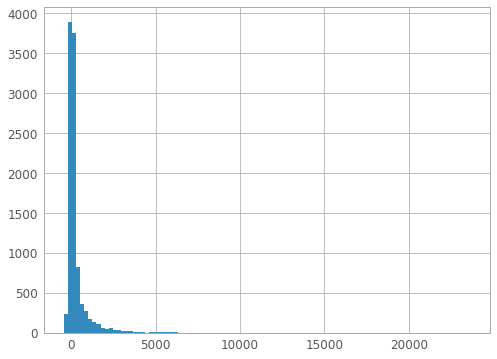

Image - Mean 349.4497375488281, Median 100.78406524658203, Min -420.3105163574219, Max 23615.919921875
Clipping to 3-sigma about median value
Numpy Background Noise: mean 93.84295541869137, std 165.5021116025386


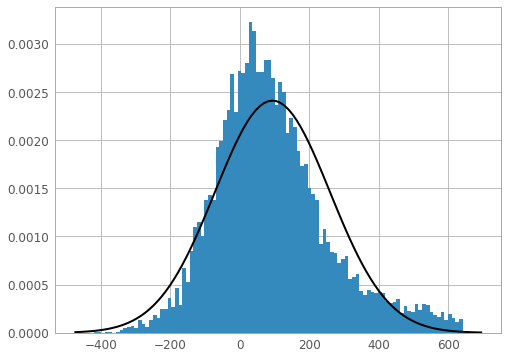

Background sky level is std of the Gaussian: 165.502
Background Noise eps: mean 0.092, should be around 10-100 eps according to K. Kuijken



/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in sqrt
/soft/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:836: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/soft/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


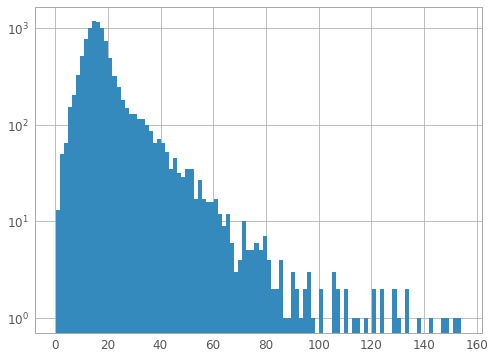

nan
What if we bullshit it and say the background sky is 100 eps.
A psf of [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] with size 50 has been generated
Resizing image to 21.
Middle pixel at index 50. New image created from indices 40 to 60 in axes 0 and 1.
New shape: (21, 21)
New things are good!
This has been fun, right? Very fun! :)
<built-in method mean of numpy.ndarray object at 0x7f27d9e24300> <built-in method std of numpy.ndarray object at 0x7f27d9e24300>
Image sent to /data/sknabel/autoz_lens_model/files/fits/G585328_3234/3234_r_image.fits
Image sent to /data/sknabel/autoz_lens_model/files/fits/G585328_3234/3234_r_psf.fits
Image sent to /data/sknabel/autoz_lens_model/files/fits/G585328_3234/3234_r_noisemap.fits
Congratulations! You simulated random noise! Eat a cookie.
This has been fun, right? Very fun! :)


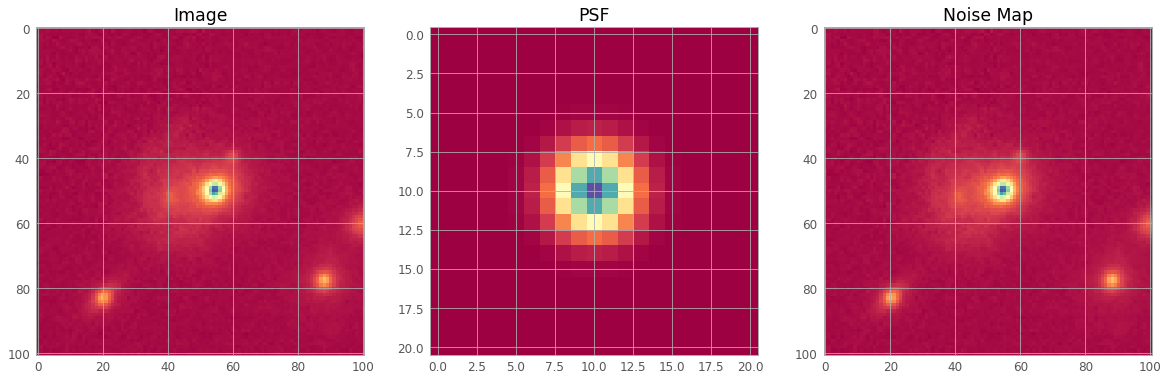

In [10]:
## r image
one_ring_to_rule_them_all(folder, r, pixel_scale=0.2, psf_array_size=21)#, resize=True, new_size=51)

One ring to rule them all... One ring to find them. One ring to bring them all, and in the darkness bind them!
Images will be in units of e-/s
Opening /data/sknabel/autoz_lens_model/files/fits/G585328_3234/3234_g.fits
Here we go again... psf = 0.6639970779418946, gain = 11986229370000.0, exp_time = 900
image min:  -1.8105399e-11
1, 2... 2 counts!
image_counts min:  -217.01547


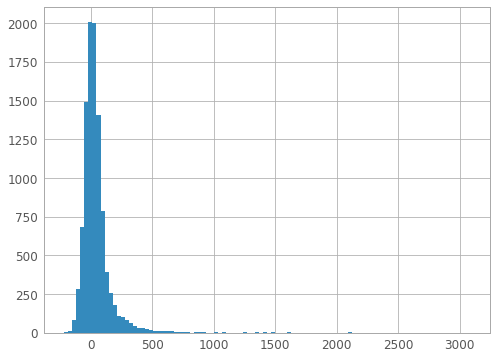

Image - Mean 47.464603424072266, Median 22.62284278869629, Min -217.01547241210938, Max 3082.836669921875
Clipping to 3-sigma about median value
Numpy Background Noise: mean 21.609396205240632, std 64.26566579279422


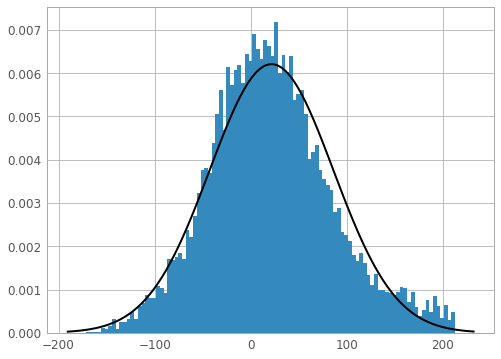

Background sky level is std of the Gaussian: 64.266
Background Noise eps: mean 0.07100000000000001, should be around 10-100 eps according to K. Kuijken



/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in sqrt
/soft/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:836: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/soft/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


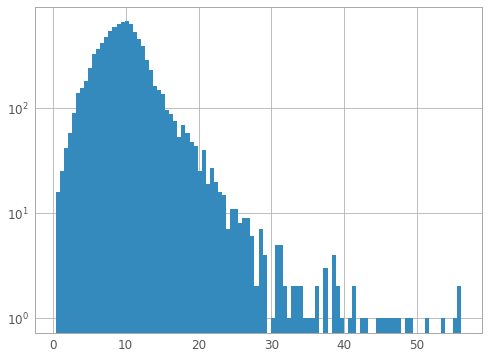

nan
What if we bullshit it and say the background sky is 100 eps.
A psf of [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] with size 50 has been generated
Resizing image to 21.
Middle pixel at index 50. New image created from indices 40 to 60 in axes 0 and 1.
New shape: (21, 21)
New things are good!
This has been fun, right? Very fun! :)
<built-in method mean of numpy.ndarray object at 0x7f27d9f10b70> <built-in method std of numpy.ndarray object at 0x7f27d9f10b70>
Image sent to /data/sknabel/autoz_lens_model/files/fits/G585328_3234/3234_g_image.fits
Image sent to /data/sknabel/autoz_lens_model/files/fits/G585328_3234/3234_g_psf.fits
Image sent to /data/sknabel/autoz_lens_model/files/fits/G585328_3234/3234_g_noisemap.fits
Congratulations! You simulated random noise! Eat a cookie.
This has been fun, right? Very fun! :)


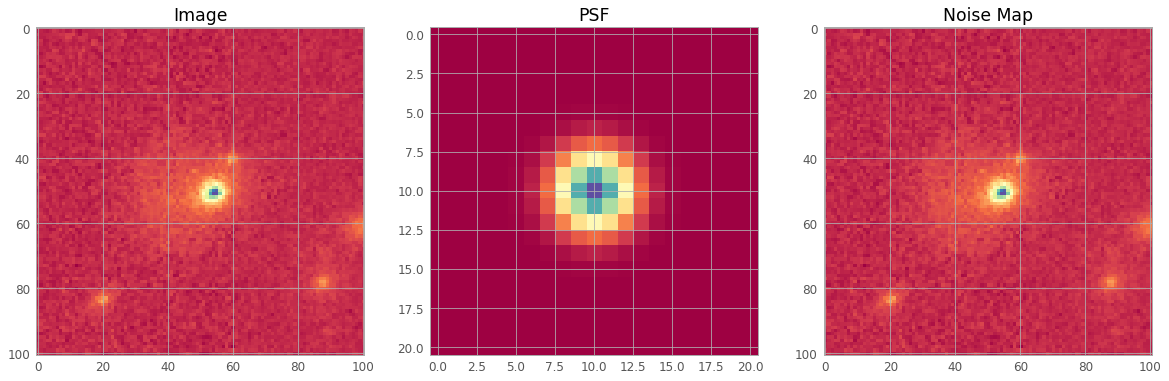

In [11]:
## g image
one_ring_to_rule_them_all(folder, g, pixel_scale=0.2, psf_array_size=21)#, resize=True, new_size=51)